In [45]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from yellowbrick.cluster import KElbowVisualizer
from pprint import pprint
from konlpy.tag import Okt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [46]:
lemmatizer = WordNetLemmatizer()

In [4]:
# period1 = pd.read_excel('period1.xlsx')
# period2 = pd.read_excel('period2.xlsx')
period3 = pd.read_excel('period3.xlsx')

In [65]:
# period_1 = period1.copy()
# period_2 = period2.copy()
period_3 = period3.copy()

In [66]:
# period_1['Full Description'] = period_1['Full Description'].fillna("Nothing") # 결측치를 "Nothing"으로 변경
# period_2['Full Description'] = period_2['Full Description'].fillna("Nothing") # 결측치를 "Nothing"으로 변경
period_3['Full Description'] = period_3['Full Description'].fillna("Nothing") # 결측치를 "Nothing"으로 변경

In [69]:
# period_1 = period_1[~(period_1['Full Description'] == "Nothing")]
# period_2 = period_2[~(period_2['Full Description'] == "Nothing")]
period_3 = period_3[~(period_3['Full Description'] == "Nothing")]

In [70]:
# documents_1 = period_1['Full Description']
# documents_2 = period_2['Full Description']
documents_3 = period_3['Full Description']

In [71]:
# tagged_data_1 = [TaggedDocument(words=lemmatizer.lemmatize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(documents_1)]
# tagged_data_2 = [TaggedDocument(words=lemmatizer.lemmatize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(documents_2)]
tagged_data_3 = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(documents_3)]

In [72]:
tagged_data_3

[TaggedDocument(words=['creditbook', 'is', 'a', 'digital', 'platform', 'that', 'serves', 'pakistan', '’', 's', 'burgeoning', 'yet', 'underserved', 'micro', ',', 'small', ',', 'and', 'medium', 'enterprises', '.'], tags=['0']),
 TaggedDocument(words=['cerebral', 'is', 'a', 'mental', 'health', 'telemedicine', 'company', 'that', 'provides', 'clients', 'with', 'long-term', ',', 'comprehensive', 'access', 'to', 'medication', 'management', ',', 'therapy', ',', 'and', 'counseling', 'for', 'anxiety', ',', 'depression', ',', 'insomnia', ',', 'adhd', ',', 'and', 'more', '.', 'it', 'offers', 'affordable', ',', 'convenient', ',', 'and', 'evidence-based', 'care', 'that', 'drives', 'significant', 'improvement', 'in', 'outcomes', 'for', 'clients', '.'], tags=['1']),
 TaggedDocument(words=['tül', 'offers', 'an', 'application', 'where', 'users', 'can', 'buy', 'hardware', 'and', 'construction', 'products', 'directly', 'from', 'their', 'phone', ',', 'at', 'the', 'time', 'that', 'best', 'suits', 'them', 'a

In [73]:
model = Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.00025, min_count=200, dm=1, window = 8, workers = 10, epochs=150)

In [74]:
model.build_vocab(tagged_data_3)

In [75]:
start_time = time.time()
# model.train(tagged_data_3, total_examples=model.corpus_count, sepochs=1000)

max_epochs = 5

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data_3,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    model.alpha -= 0.002
    model.min_alpha = model.alpha

end_time = time.time()

print(f"Time: {(end_time - start_time):.3f} sec", end=' / ')

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
Time: 1434.338 sec / 

In [60]:
model.save("d2v_3.model")
print("Model Saved")

Model Saved


In [61]:
X = model.dv.vectors

In [62]:
inertia_arr = []
k_range = range(2, 9)

for k in k_range:
    Kmeans = KMeans(n_clusters=k)
    Kmeans.fit(X)
    interia = Kmeans.inertia_
    
    print('k :', k, 'inertia :', interia)
    
    inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr)

k : 2 inertia : 3411718.75
k : 3 inertia : 3358817.0
k : 4 inertia : 3315009.0
k : 5 inertia : 3283494.5
k : 6 inertia : 3246644.25
k : 7 inertia : 3226248.25
k : 8 inertia : 3208820.0


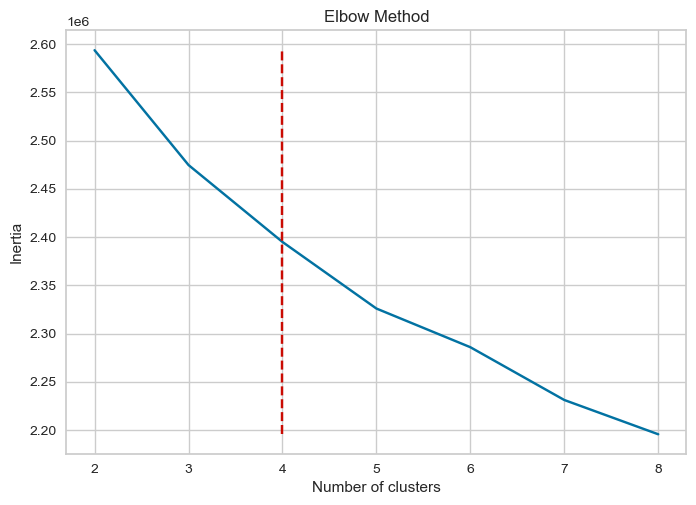

In [117]:
# Elbow Method
plt.plot(k_range, inertia_arr)
# plt.vlines(3, ymin = inertia_arr.min() * 0.9999, ymax = inertia_arr.max() * 1.0003, linestyles = '--', colors = 'g')
plt.vlines(4, ymin = inertia_arr.min() * 0.9999, ymax = inertia_arr.max() * 1.0003, linestyles = '--', colors = 'r')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

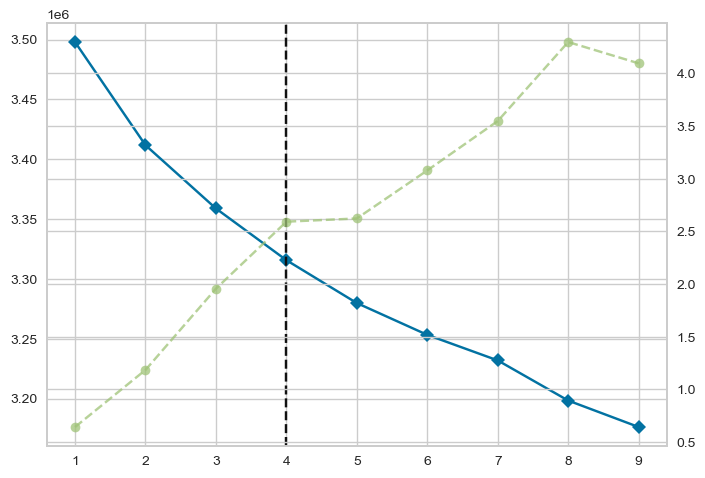

In [63]:
# Yellow brick
models = KMeans()
Visualizer = KElbowVisualizer(models, k = (1, 10))
Visualizer.fit(X)

In [34]:
# Clustering
Clustering_Method = KMeans(n_clusters=4)

Clustering_Method.fit(X)

KMeans(n_clusters=4)

In [35]:
period_3['Clustering'] = Clustering_Method.labels_

In [47]:
pprint(period_3[period_3['Clustering'] == 0]['Description'].head(10))

2     Tül offers an application where users can buy ...
4     MicroAcquire is a startup acquisition marketpl...
6     Phantom Space focuses on space transportation ...
7     Lucidum is the asset discovery company that el...
8     Nextbillion.ai develops AI-powered hyperlocal ...
9     Doji is an online real-time marketplace for us...
13    Stela is Asia's first music library that licen...
14    Assets and Digital Assets financial service pr...
16    Moxion Power develops zero-emission generators...
19    Telecom, Forestry, IOT, Sensors, Networking, A...
Name: Description, dtype: object


In [48]:
pprint(period_3[period_3['Clustering'] == 1]['Description'].head(10))

0     CreditBook is a digital platform that serves P...
1     Cerebral is a mental health telemedicine compa...
3     Polymer is a data governance and privacy platf...
5     Buzzer is a notification-driven mobile platfor...
10    Your software today lives in links, not disks....
11    Playbook organize your creative files visually...
17    ChatPay helps talented people to easily moneti...
20    CleanHub empowers brands to minimize their pla...
22    See, Know, and Defend Your Industrial Environment
25    Infrastructure software to simplify sensor int...
Name: Description, dtype: object


In [49]:
pprint(period_3[period_3['Clustering'] == 2]['Description'].head(10))

12     Okra is the Open finance infrastructure that e...
15     A new social universe for exchanging knowledge...
27     The digital world for Gen Z sports & eSports f...
37     The only mobile marketplace offering dog owner...
61     Salesbeat uses big data & machine learning to ...
75     Cameraah is a no-code tool to create AR experi...
77             Automated Indoor Waste & Recycling System
106    Stairwage improves financial well-being of the...
112    Rent Furniture, Appliances & Electronics On Mo...
118    Soft- & hardware comprehensive solution for PP...
Name: Description, dtype: object


In [160]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(period_3['Description'])
tfidf_vectorizer.vocabulary_
sorted(tfidf_vectorizer.vocabulary_.items())

[('00', 0),
 ('000', 1),
 ('01', 2),
 ('011h', 3),
 ('03', 4),
 ('0carbonfuture', 5),
 ('10', 6),
 ('100', 7),
 ('1000', 8),
 ('1000hires', 9),
 ('1000s', 10),
 ('100100', 11),
 ('100asa', 12),
 ('100ft', 13),
 ('100k', 14),
 ('100m', 15),
 ('100mg', 16),
 ('100ms', 17),
 ('100s', 18),
 ('100x', 19),
 ('101', 20),
 ('101gen', 21),
 ('103', 22),
 ('1080p', 23),
 ('10club', 24),
 ('10m', 25),
 ('10rb', 26),
 ('10x', 27),
 ('11', 28),
 ('110', 29),
 ('1111', 30),
 ('12', 31),
 ('120', 32),
 ('123', 33),
 ('125', 34),
 ('12guide', 35),
 ('12th', 36),
 ('13', 37),
 ('131', 38),
 ('14', 39),
 ('149', 40),
 ('15', 41),
 ('150', 42),
 ('150x', 43),
 ('15min', 44),
 ('15th', 45),
 ('16', 46),
 ('1606', 47),
 ('17', 48),
 ('170', 49),
 ('1720211', 50),
 ('18', 51),
 ('180', 52),
 ('1800bitcoin', 53),
 ('18flip', 54),
 ('19', 55),
 ('1966', 56),
 ('1984', 57),
 ('1bfc', 58),
 ('1bn', 59),
 ('1built4u', 60),
 ('1e', 61),
 ('1ecommerce', 62),
 ('1id', 63),
 ('1inch', 64),
 ('1km', 65),
 ('1m', 66),

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

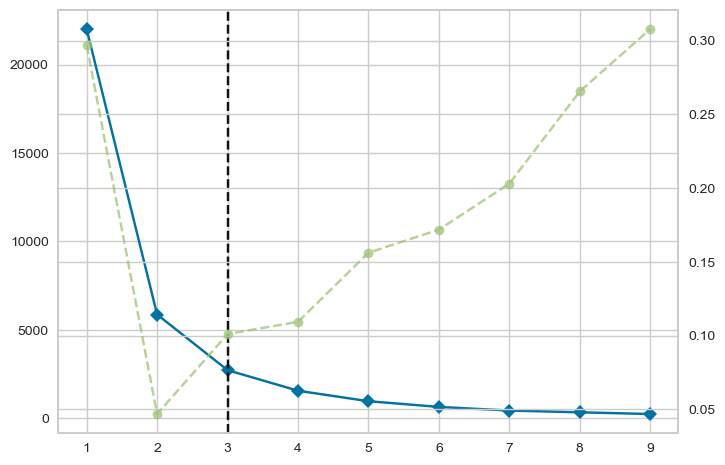

In [165]:
# Yellow brick
models = KMeans()
Visualizer = KElbowVisualizer(models, k = (1, 10))
Visualizer.fit(tfidf_vectorizer.idf_.reshape(-1, 1))

In [167]:
# Clustering
Clustering_Method = KMeans(n_clusters=3)

Clustering_Method.fit(tfidf_vectorizer.idf_.reshape(-1, 1))

KMeans(n_clusters=3)